<a href="https://colab.research.google.com/github/EtienneDouillard/Projet_M1/blob/main/Livrables/5_1_presentation_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialisation

In [ ]:
#classe Reseau
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras
import itertools
import random

#premiere partie
import pandas as pd
import numpy as np
import math

from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Téléchargement données et modèle

In [ ]:
dTestx = pd.read_csv('/content/drive/MyDrive/Projet-M1-Deep-FDA/Codes/Python/1-Simulation_data/Data/testFixe_indice45.csv')
dBase = pd.read_csv('/content/drive/MyDrive/Projet-M1-Deep-FDA/Codes/Python/1-Simulation_data/Data/baseTestFixe_indice45.csv')
dataTest = pd.DataFrame(data=dTestx); #création nouvelle dataframe
dataBase = pd.DataFrame(data=dBase)


x_test = dataTest['x_test']
y_test = dataTest['y_test']
lengthTest = int(len(x_test)/50)
x_test = np.array(x_test).reshape(lengthTest,1,50)
y_test = np.array(y_test).reshape(lengthTest,1,50)

x_base = dataBase['x_base']
x_part = dataBase['x_part']
x_base = np.array(x_base).reshape(int(len(x_base)/50),50)
x_part = np.array(x_part).reshape(int(len(x_part)/50),50)

u_true_mat = np.array([x/50 for x in range(50)])



In [ ]:
modelMSE = keras.models.load_model('/content/drive/MyDrive/Projet-M1-Deep-FDA/Codes/Python/3-Entrainements/Bests_algo_modelesFixe_indice45/modelMSE')
pred = modelMSE.predict(x_test)


In [ ]:
modelMSE.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 50)]           0         
_________________________________________________________________
gru (GRU)                    (None, 1, 800)            2044800   
_________________________________________________________________
dropout (Dropout)            (None, 1, 800)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1, 50)             40050     
_________________________________________________________________
p_re_lu (PReLU)              (None, 1, 50)             50        
Total params: 2,084,900
Trainable params: 2,084,900
Non-trainable params: 0
_________________________________________________________________


# plot du résultat

In [ ]:
y_test = y_test.reshape(lengthTest,50)
pred = pred.reshape(lengthTest,50)

In [ ]:
print(pred.shape,y_test.shape,x_part.shape)

(10000, 50) (10000, 50) (10000, 50)


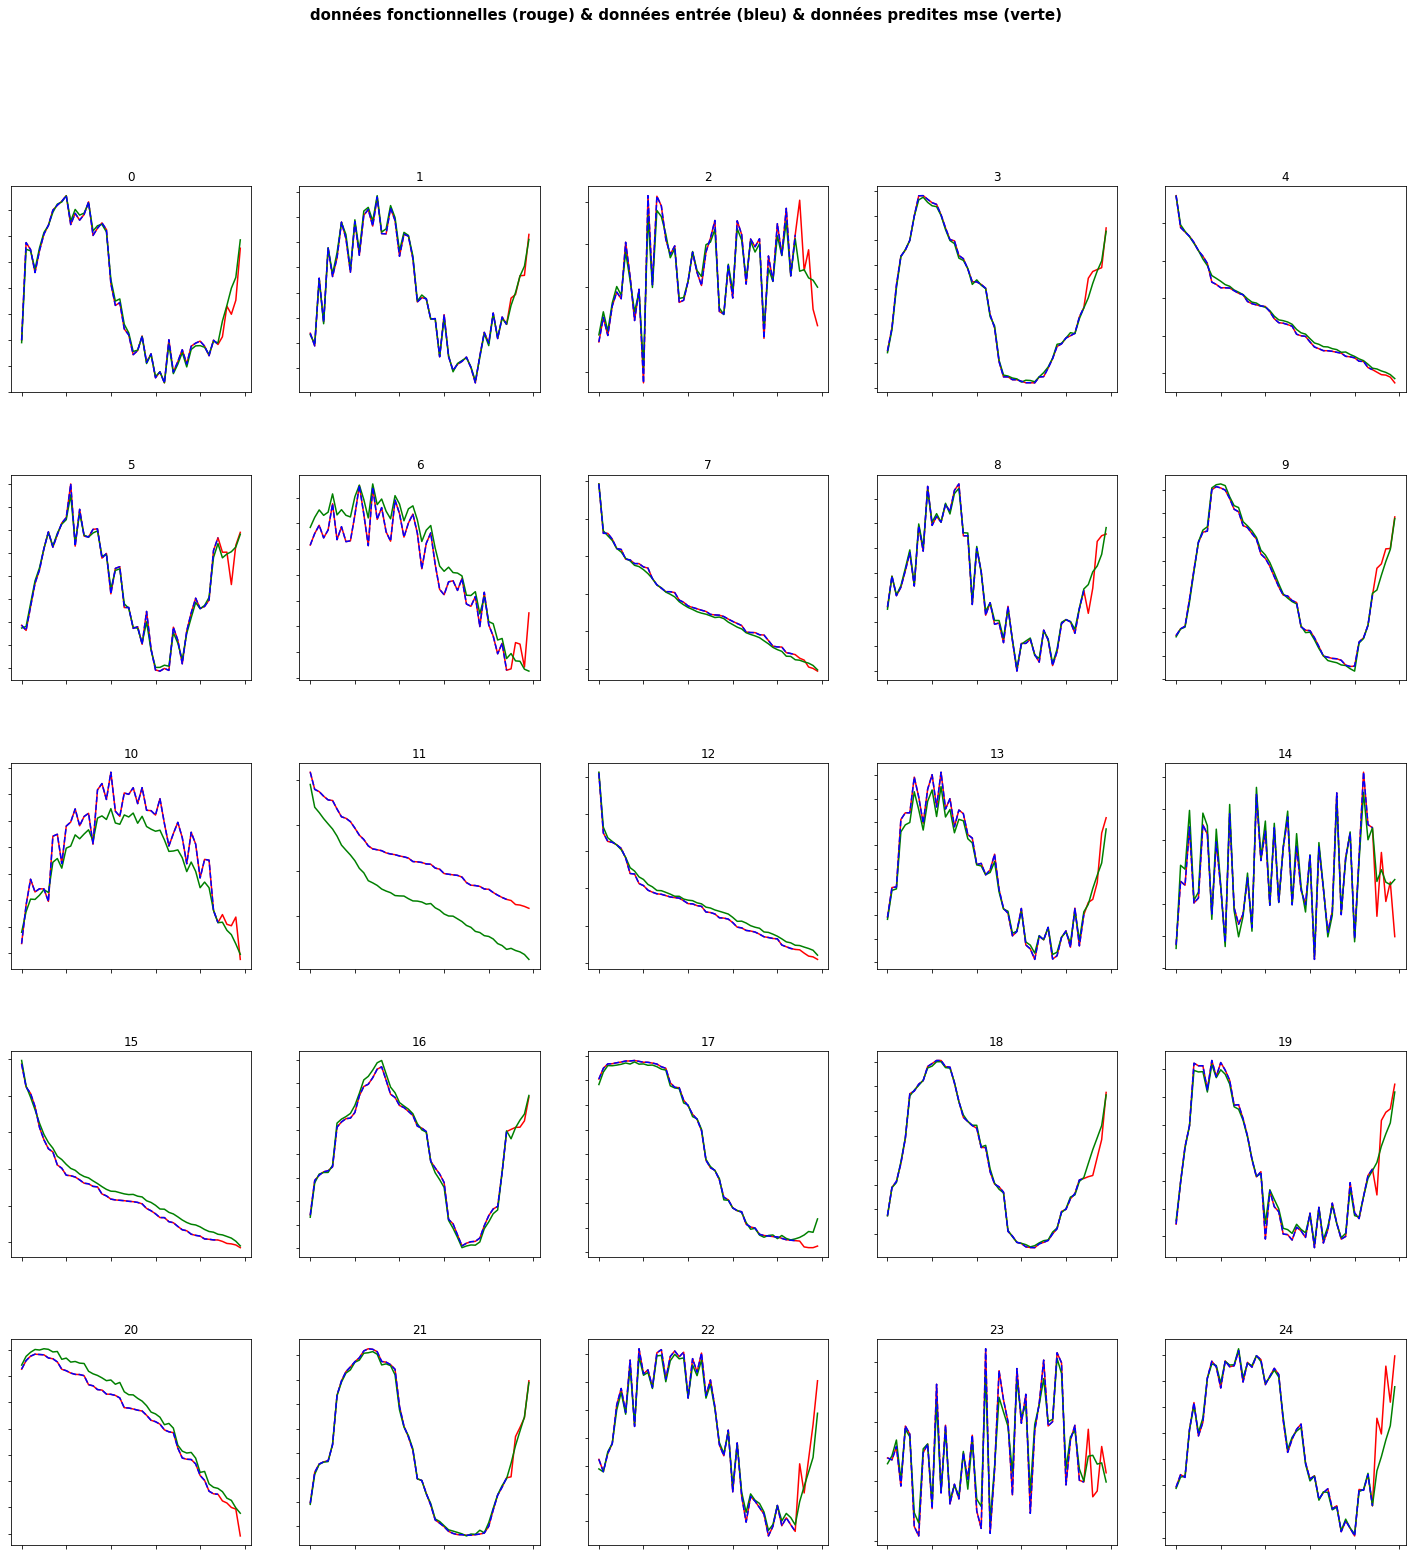

In [ ]:

#---------------------------------------------------
#permet de plot la prédiction du model

row = 5
col = 5

fig, ax = plt.subplots(nrows=row,ncols=col,figsize=(row*5,col*5))
i = 0

fig.suptitle('données fonctionnelles (rouge) & données entrée (bleu) & données predites mse (verte)',fontweight ="bold",fontsize=15)


while i<row*col:
      i1 = int(i/col)
      i2 = i%col
      ax[i1,i2].plot(u_true_mat,y_test[i,:], 'r')
      ax[i1,i2].plot(u_true_mat,pred[i,:],'-g')
      ax[i1,i2].plot(u_true_mat,x_part[i,:],'--b')

      ax[i1,i2].set(title=i)
      ax[i1,i2].set_xticklabels([])
      ax[i1,i2].set_yticklabels([])
      plt.gcf().subplots_adjust(hspace=0.4)
      i+=1


# Creation de la courbe unique

Pour chaque courbe, deux courbes sont créées. Celles-ci sont réajustées par rapport à une différence de l'originale et de la prédiction

In [ ]:

newCourbe = np.array(x_part)
predictionCourbe = np.full(x_part.shape,np.nan)
for i in range(lengthTest): 
 
  calcul_diff=0
    
  if not np.isnan(x_part[i,0]):
      diff = pred[i,0] - x_part[i,0]
  else:
      diff = 0
      calcul_diff=1


  for j in range(50):
      if(j+1<49):
          if (np.isnan(x_part[i,j+1]) and calcul_diff==0 ):
              diff = pred[i,j] - x_part[i,j]
              calcul_diff=1
              predictionCourbe[i,j] = x_part[i,j]
      if(j-1>0):       
          if (np.isnan(x_part[i,j-1])):
              predictionCourbe[i,j] = x_part[i,j]
      if (np.isnan(x_part[i,j])):
          newCourbe[i,j] = pred[i,j] - diff
          predictionCourbe[i,j] = pred[i,j] - diff
    


Différenciation des courbes

In [ ]:
print(predictionCourbe[0])
print('\n')
print(newCourbe[0])

[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan -0.04435721  0.16770448  0.31784092  0.48463454
  0.58880283  0.95115944]


[-2.22578260e-03  9.39755221e-01  8.72778217e-01  6.50913641e-01
  8.61722494e-01  1.02140733e+00  1.10644977e+00  1.25319800e+00
  1.30122609e+00  1.33933144e+00  1.39328198e+00  1.11412148e+00
  1.22230749e+00  1.15655135e+00  1.21176691e+00  1.33356991e+00
  1.00906532e+00  1.07878394e+00  1.13043383e+00  1.06559591e+00
  5.43066325e-01  3.33208754e-01  3.59484804e-01  1.06094861e-0

Affichage

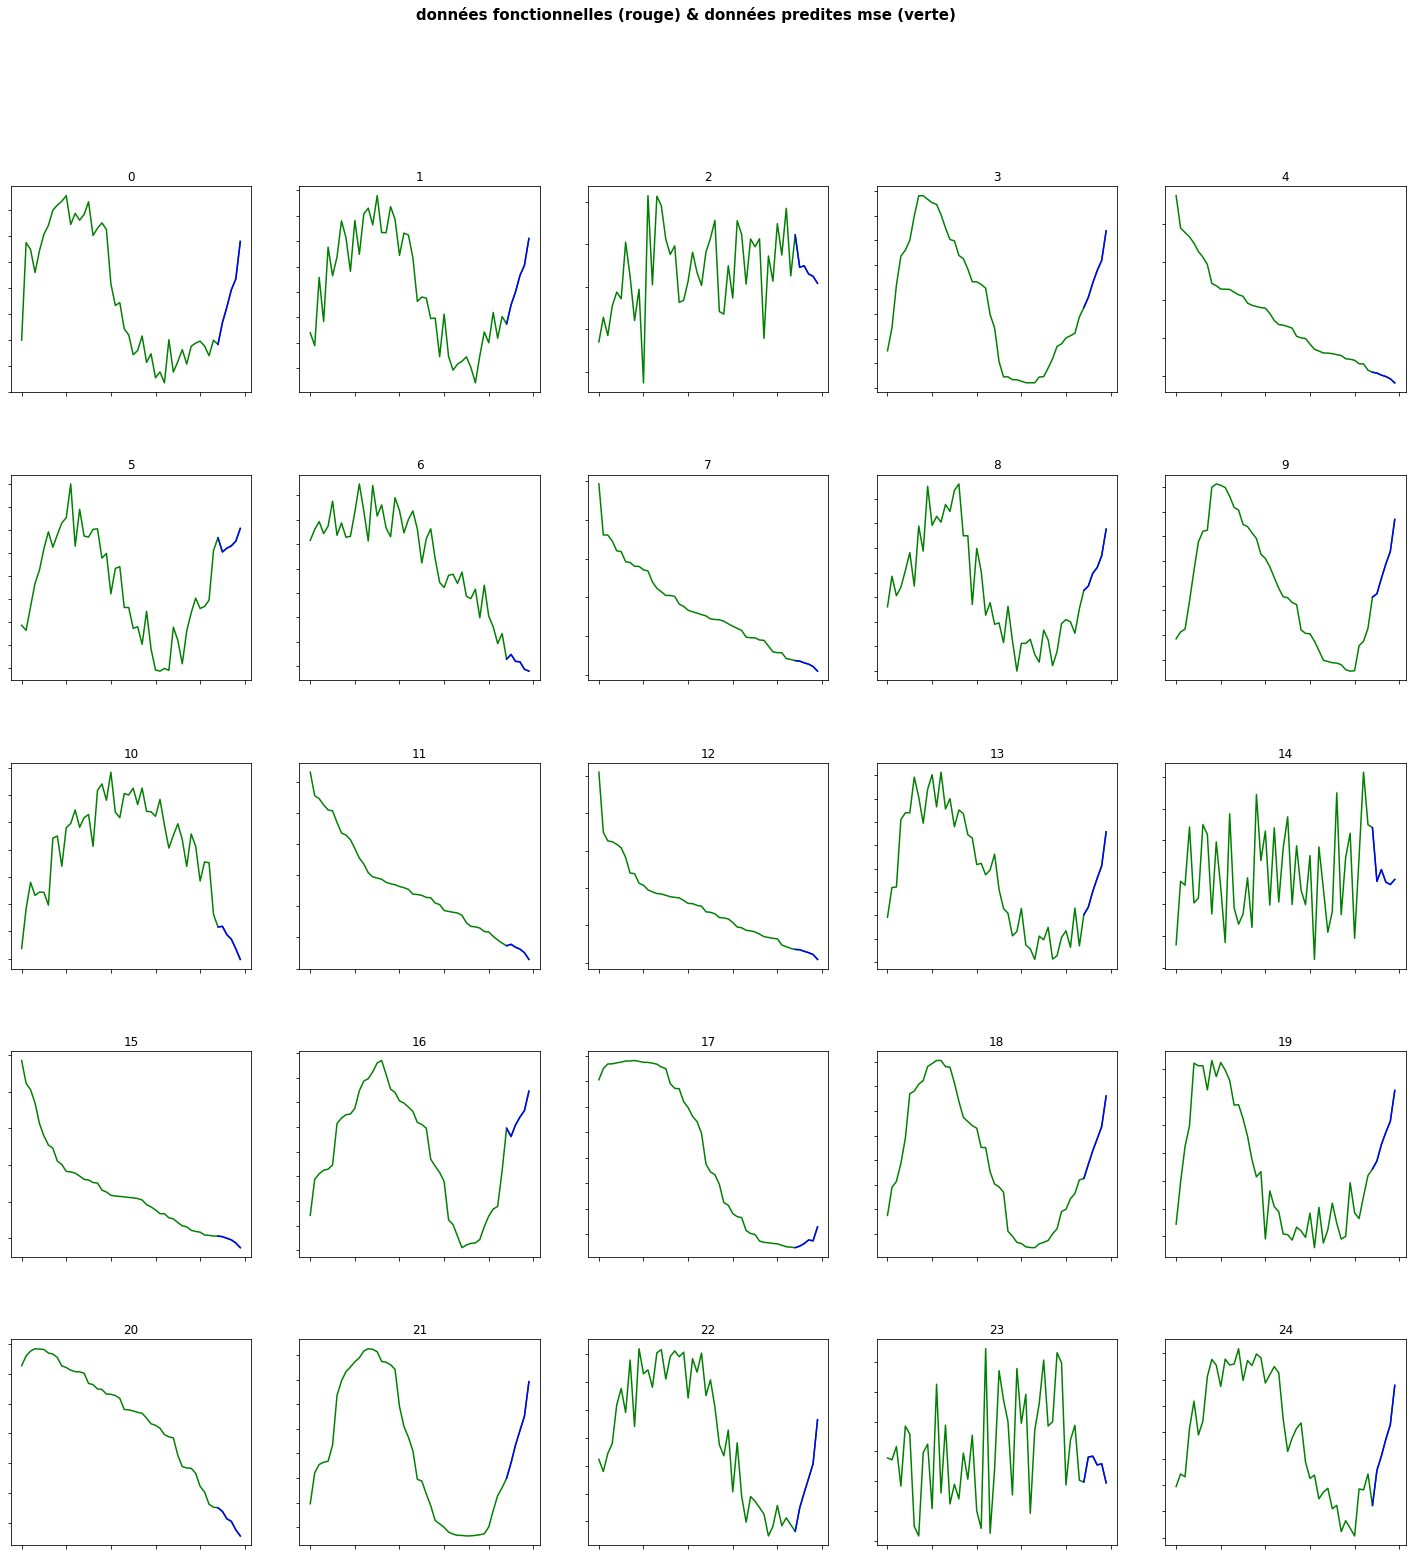

In [ ]:




#---------------------------------------------------
#permet de plot la prédiction du model

row = 5
col = 5

fig, ax = plt.subplots(nrows=row,ncols=col,figsize=(row*5,col*5))
i = 0

fig.suptitle('données fonctionnelles (rouge) & données predites mse (verte)',fontweight ="bold",fontsize=15)


while i<row*col:
      i1 = int(i/col)
      i2 = i%col
      ax[i1,i2].plot(u_true_mat,newCourbe[i,:],'-g')
      ax[i1,i2].plot(u_true_mat,predictionCourbe[i,:],'-b')


      ax[i1,i2].set(title=i)
      ax[i1,i2].set_xticklabels([])
      ax[i1,i2].set_yticklabels([])
      plt.gcf().subplots_adjust(hspace=0.4)
      i+=1

Comparaison du mean squarred error entre celle voulu et celle prédite

In [ ]:
from sklearn.metrics import mean_squared_error
  
# Calculation of Mean Squared Error (MSE)
mean_squared_error(y_test,pred)

0.00599300995344895